In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = (12, 8.5)


In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


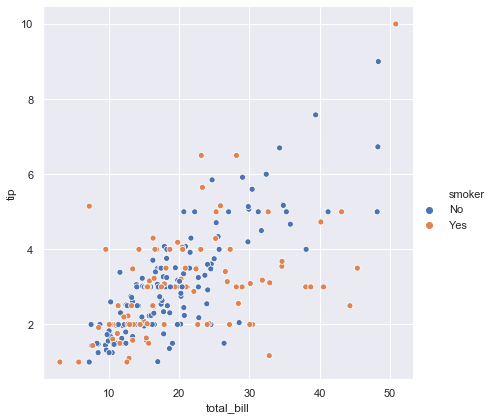

In [3]:
sns.relplot(x = "total_bill", y = "tip", hue = 'smoker', data = tips, height = 6);
# set `height` parameter to change the size of plot

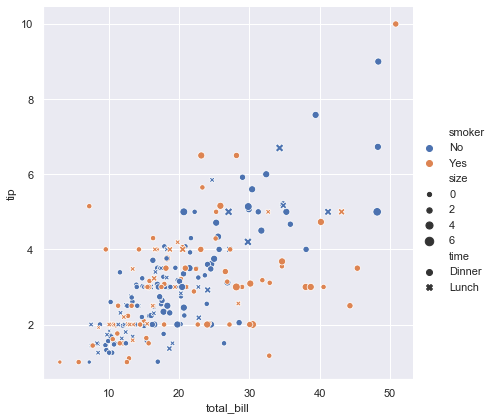

In [4]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", size = 'size', data=tips, height = 6);

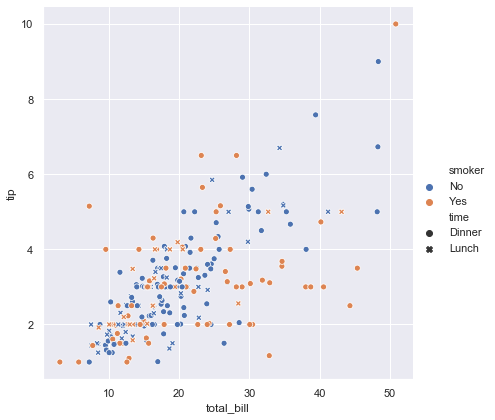

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips, height = 6);

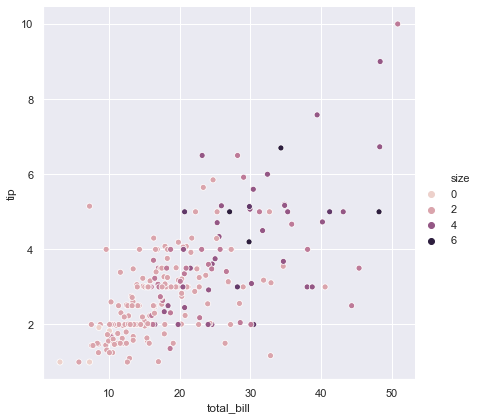

In [6]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips, height = 6);

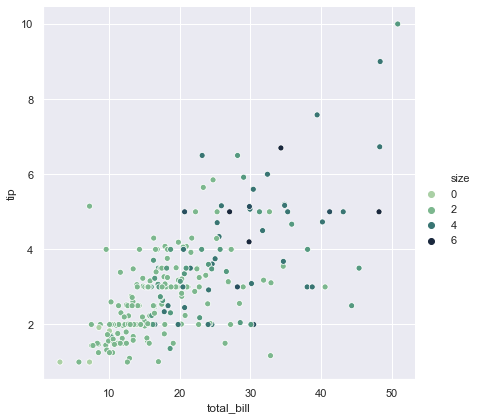

In [7]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips, height = 6)

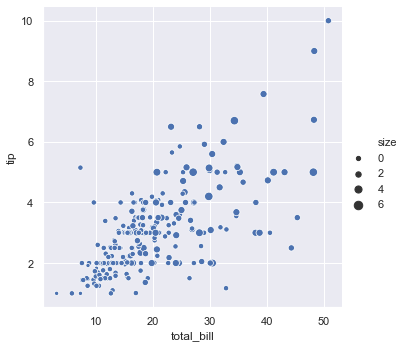

In [8]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips, height = 5);

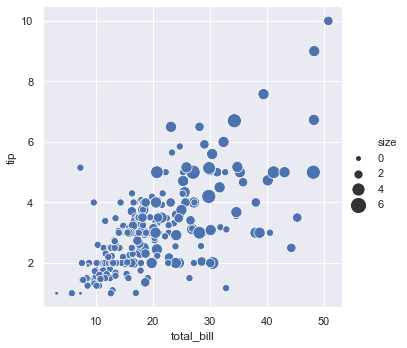

In [9]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips, height =5);

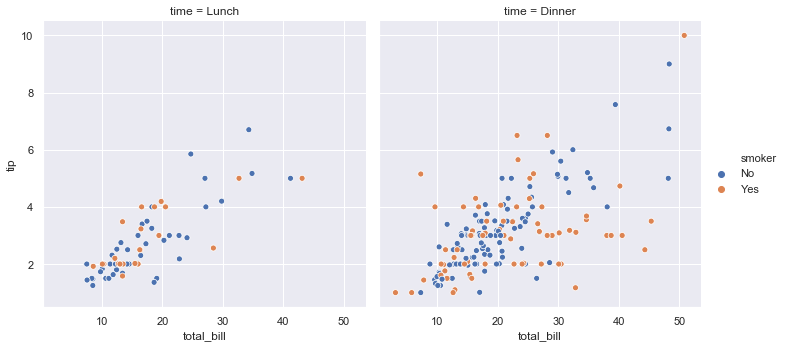

In [10]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

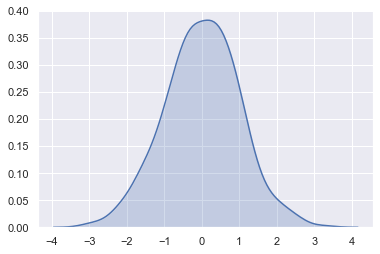

In [11]:
plt.rcParams['figure.figsize'] = (6, 4)
x = np.random.randn(500)
sns.kdeplot(x, shade = True)

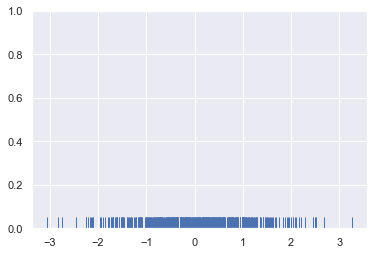

In [12]:
sns.rugplot(x)

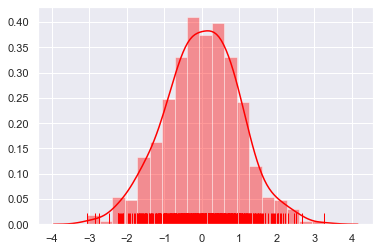

In [13]:
sns.distplot(x, rug = True, color = 'red')

In [14]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [15]:

fmri['event'].unique(), fmri['region'].unique()

(array(['stim', 'cue'], dtype=object),
 array(['parietal', 'frontal'], dtype=object))

In [16]:
fmri['timepoint'].unique()

array([18, 14, 17,  9, 16, 15,  0, 13, 12, 11, 10,  3,  7,  8,  2,  6,  5,
        4,  1])

#### Aggregation and representing uncertainty

More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

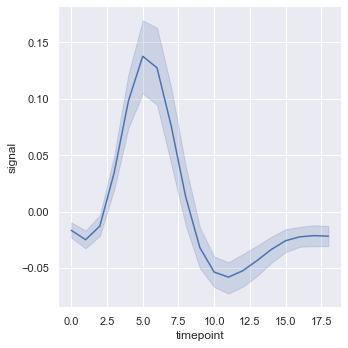

In [17]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, height = 5);

Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

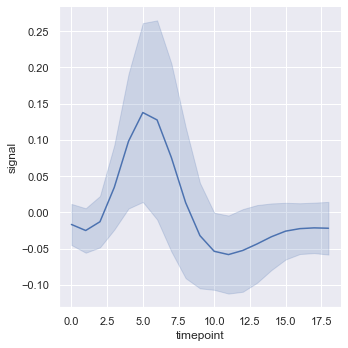

In [18]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

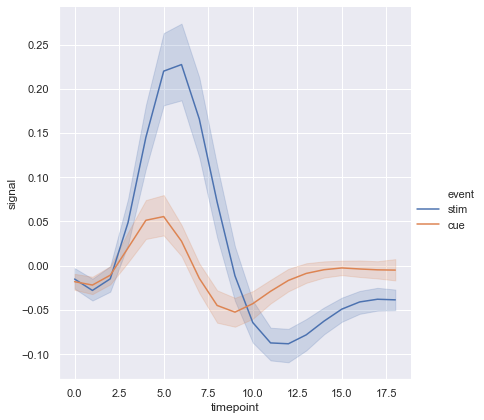

In [19]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri, height = 6);

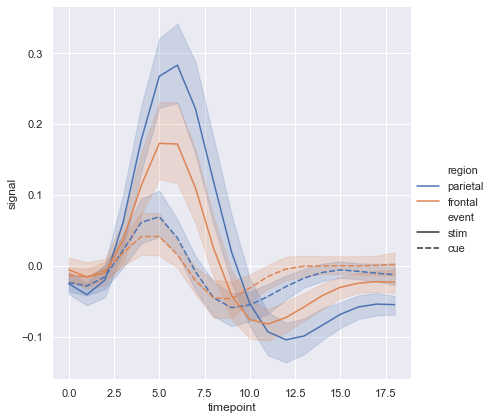

In [20]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri, height = 6);

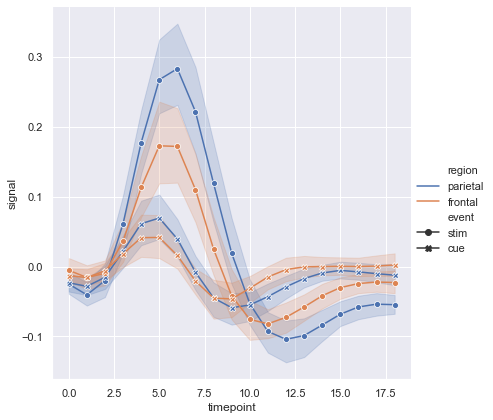

In [21]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri, height = 6);

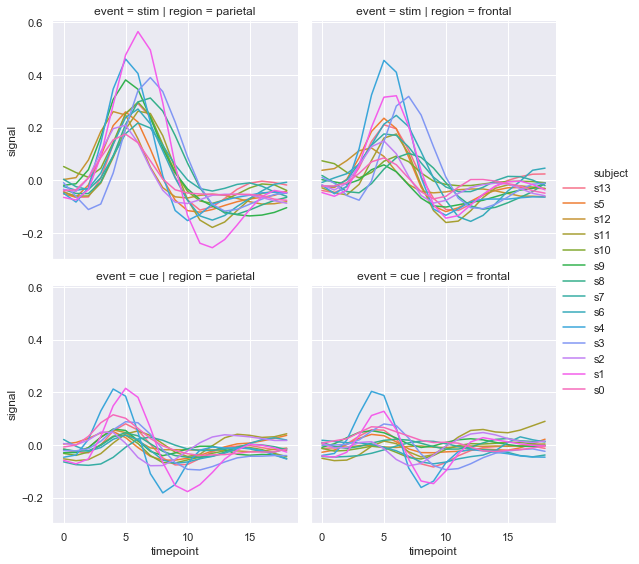

In [22]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=4,
            kind="line", estimator=None, data=fmri);

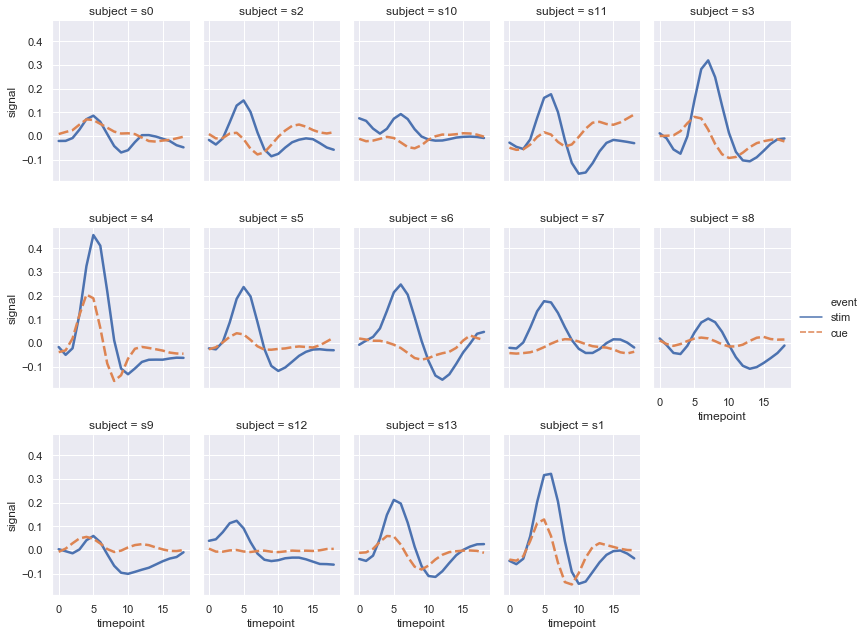

In [23]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

##### Example - `pd.melt` and `sns.lmplot`

In [25]:
ad = pd.read_csv("/Users/user/miniconda3/notebooks/TD Petrou - ML/Introduction to Statistical Learning/data/Advertising.csv")
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [26]:
ad_melt = pd.melt(ad, value_vars=['TV', 'Radio', 'Newspaper'], id_vars='Sales', value_name='adv_budget')
ad_melt.head(10)

,Sales,variable,adv_budget
0,22.1,TV,230.1
1,10.4,TV,44.5
2,9.3,TV,17.2
3,18.5,TV,151.5
4,12.9,TV,180.8
5,7.2,TV,8.7
6,11.8,TV,57.5
7,13.2,TV,120.2
8,4.8,TV,8.6
9,10.6,TV,199.8


(0, 35)

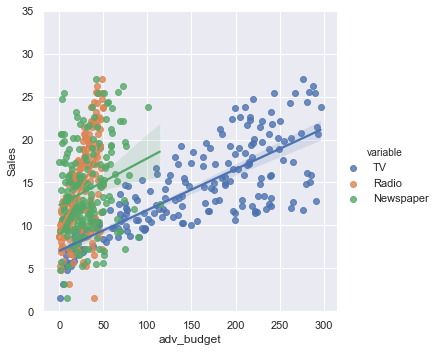

In [27]:
sns.lmplot('adv_budget','Sales',data = ad_melt, hue = 'variable', fit_reg = True)
plt.ylim(0,35)